# ECE 590, Fall 2019 
## Problem Set 2 

## Full name: Ana Belen Barcenas J.


In [249]:
import numpy as np

### Problem 2 (Gaussian Mixture Model)

In [163]:
###### Problem 2.1 ###### 

phi = [1/8, 1/8, 1/4, 1/2]

mu_sigma = {"phi_1":{"mu":(0,0), "sigma":np.array([[0.2,0.1],[0.1,0.2]])}, 
      "phi_2":{"mu":(0,2), "sigma":np.array([[0.1,-0.15],[-0.15,0.3]])},
      "phi_3":{"mu":(2,0), "sigma":np.array([[0.3,0.05],[0.05,0.3]])},
      "phi_4":{"mu":(2,2), "sigma":np.array([[0.15,0],[0,0.15]])}
     }

def GMM_samples(n, phi, mu_sigma):
    samples = np.zeros((n,2))
    keys = list(mu_sigma.keys())
    
    # First, sample 10^3 k's from categorical distribution parametrized by vector phi
    k = np.random.choice(len(phi), n, p = phi)
    
    # Second, given k for each 10^3 observstion, sample a random 2D sample given k's mean and 
    # covariance matrices (defined above as mu_sigma dictionary)
    for i,j in enumerate(k):
        pair = np.random.multivariate_normal(mu_sigma[keys[j]]["mu"], mu_sigma[keys[j]]["sigma"])
        samples[i] = pair
    return samples      

In [164]:
samples = GMM_samples(10**3,phi,mu_sigma)

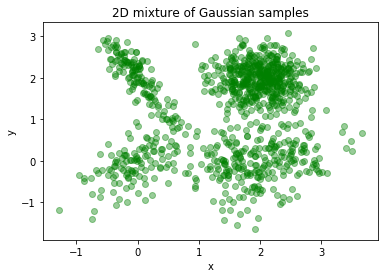

In [183]:
# Plot the 2D mixture of gaussians samples

import matplotlib.pyplot as plt

x = samples[:,0]
y = samples[:,1]

plt.scatter(x, y, alpha=0.4, c="green")
plt.title('2D mixture of Gaussian samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<function matplotlib.pyplot.show>

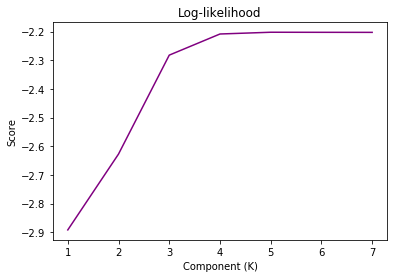

In [181]:
###### Problem 2.2 ###### 

from sklearn import mixture

K = [1,2,3,4,5,6,7]
scores = np.zeros((len(K),1))

for i, k in enumerate(K):
    g = mixture.GaussianMixture(n_components=k)
    g.fit(samples)
    scores[i] = g.score(samples)
    
plt.plot(K,scores, c="purple")
plt.title('Log-likelihood')
plt.ylabel('Score')
plt.xlabel('Component (K)')
plt.show

### Problem 3 (Bias-variance trade-off)

In [473]:
# Program to generate the corresponding real-valued targets
def real_targets(x):
    t = []
    for i in x:
        t_i = math.sin(2*math.pi*i)+math.cos(4*math.pi*i)
        t.append(t_i)
    return t


# Generate a training dataset
X_train = np.arange(0,1,0.2)
y_train = real_targets(X_train)

In [474]:
# Generate a test dataset

X_test = np.arange(0,1,0.01)
y_test = real_targets(X_test)

In [521]:
# Let's define a function to return the sum of square error from 
# fitting multiple polynomials of M degrees to the train data and then
# evaluating on both train and test datasets

def fit_polynomials(X_train, X_test, y_train, y_test ,M):

    sse_train = []
    sse_test = []
    for k in M:
        coef_train = np.polyfit(X_train, y_train, k)

        pred_train = np.polyval(coef_train, X_train)
        pred_test = np.polyval(coef_train, X_test)
        
        diff_train   = y_train - pred_train
        ss_res_train = np.sum(np.square(diff_train))
        sse_train.append(ss_res_train)

        diff_test   = y_test - pred_test
        ss_res_test = np.sum(np.square(diff_test))
        sse_test.append(ss_res_test)

    return sse_train, sse_test

In [522]:
# Fit polynomial models to training and test datasets

M = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

sse_train, sse_test = fit_polynomials(X_train, X_test, y_train, y_test, M)


/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
/Users/anabelen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Po

<function matplotlib.pyplot.show>

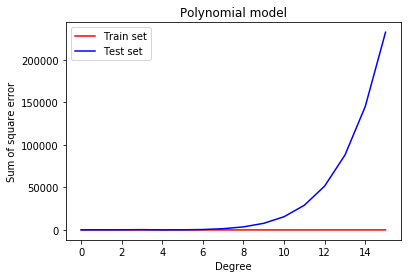

In [523]:
# Plot the SSE for each degree and the train and test datasets

plt.plot(M,sse_train, c="red", label='Train set')
plt.plot(M,sse_test, c="blue", label='Test set')
plt.legend(loc='upper left')

plt.title('Polynomial model')
plt.ylabel('Sum of square error')
plt.xlabel('Degree')
plt.show

<function matplotlib.pyplot.show>

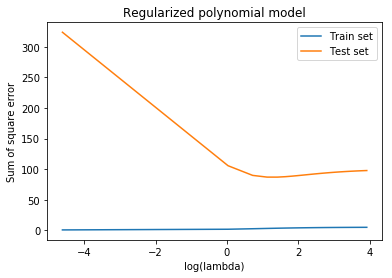

In [519]:
# Fit a polynomial for M={14}

from sklearn.pipeline import make_pipeline

lambda_space = np.linspace(10**(-2), 50, 50)
log_lambda_space = np.log(lambda_space)

sse_train = []
sse_test = []

for i in lambda_space:
    model = make_pipeline(PolynomialFeatures(14), Ridge(alpha=i))
    model.fit(X_train.reshape(-1, 1), y_train)
    
    pred_train = model.predict(X_train.reshape(-1, 1))
    pred_test = model.predict(X_test.reshape(-1, 1))
    
    
    diff_train   = y_train - pred_train
    ss_res_train = np.sum(np.square(diff_train))
    sse_train.append(ss_res_train)

    diff_test   = y_test - pred_test
    ss_res_test = np.sum(np.square(diff_test))
    sse_test.append(ss_res_test)




plt.plot(log_lambda_space, sse_train,  label='Train set')
plt.plot(log_lambda_space, sse_test,  label='Test set')

plt.legend(loc='upper right')

plt.title('Regularized polynomial model')
plt.ylabel('Sum of square error')
plt.xlabel('log(lambda)')
plt.show

### Problem 6 (Nonlinear Basis Functions)

In [265]:
# Let's create two 2D GM datasets

# GMM-1
phi = [1]
mu_sigma = {"phi_1":{"mu":(0,0), "sigma":np.array([[0.1,0],[0,0.1]])}}
GMM_1 = GMM_samples(100, phi, mu_sigma)

# GMM-2
phi = [1/2, 1/2]
mu_sigma = {"phi_1":{"mu":(-1,-1), "sigma":np.array([[0.1,0],[0,0.1]])}, 
            "phi_2":{"mu":(1,1), "sigma":np.array([[0.1,0],[0,0.1]])}}
GMM_2 = GMM_samples(200, phi, mu_sigma)

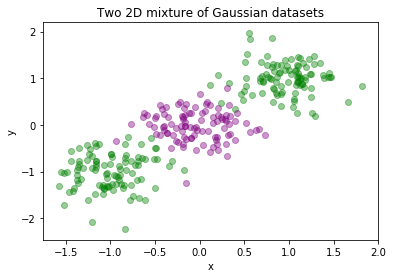

In [266]:
# Now, let's plot both datasets

x_1 = GMM_1[:,0]
y_1 = GMM_1[:,1]

x_2 = GMM_2[:,0]
y_2 = GMM_2[:,1]

plt.scatter(x_2, y_2, alpha=0.4, c="green")
plt.scatter(x_1, y_1, alpha=0.4, c="purple")
plt.title('Two 2D mixture of Gaussian datasets')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It's *not* possible to separate both datasets with a single line. To apply a transformation to the data could be useful.

In [241]:
# Let's apply a transformation to the datasets to find 
# decision boundaries that separate the datasets in a new feature space

import math

def phi_basis_fn(X, mu): 
    # X = GMM_1 (or GMM_2) a (100x2) array
    # mu has to be a (2x1) dimension array
    trans = []
    for i,j in enumerate(X):
        x = np.reshape(X[i],(2,1))
        x_mu = np.subtract(x,mu)
        x_mu_prod = (x_mu.T).dot(x_mu)
        phi_ = math.exp((-1/2)*x_mu_prod)
        trans.append(phi_)
    return trans

In [274]:
# Let's define the mu
mu_0 = np.reshape(np.array((0,0)),(2,1))
mu_1 = np.reshape(np.array((-1,-1)),(2,1))

# Now let's apply the transformation to each sample
phi_1_GMM1 = phi_basis_fn(GMM_1,mu_0)
phi_2_GMM1 = phi_basis_fn(GMM_1,mu_1)

phi_1_GMM2 = phi_basis_fn(GMM_2,mu_0)
phi_2_GMM2 = phi_basis_fn(GMM_2,mu_1)

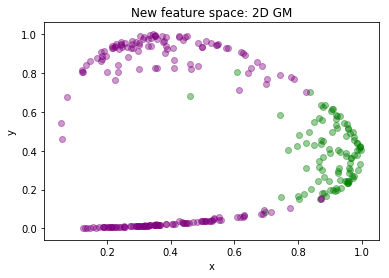

In [279]:
plt.scatter(phi_1_GMM1, phi_2_GMM1, alpha=0.4, c="green")
plt.scatter(phi_1_GMM2, phi_2_GMM2, alpha=0.4, c="purple")
plt.title('New feature space: 2D GM')
plt.xlabel('x')
plt.ylabel('y')
plt.show()